In [1]:
import json
import pandas as pd
from afinn import Afinn
import shelve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Initiate Afinn Class
-------------------
Afinn is an expanded wordlist
that includes scoring for emoticons and
very offenise language

In [2]:
af = Afinn()

Data Prep
---------
The review data is loaded then converted to list of lists

In [3]:
data = json.load(open('data.json', 'rb'))

data_list = [(value['Author'], value['AuthorLocation'], value['ReviewID'],
              value['Date'], value['Title'], value['Ratings'],
              value['Content'], 0) for value in data['Reviews']]

Create Dataframe
----------------
The list of list is converted to dataframe with appropriate headers

In [4]:
df = pd.DataFrame(data_list, columns=['Author', 'Location', 'Id', 'Date',
                                      'Title', 'Ratings', 'Content', 'Score'])

Calculate Score
---------------
Looping over the content, the afinn scoring function is applied 

In [5]:
df['Score'] = [af.score(content) for content in df['Content']]
df.head()

,Author,Location,Id,Date,Title,Ratings,Content,Score
0,gowharr32,Boston,UR126946257,"March 29, 2012",“Excellent Hotel & Location”,"{u'Service': u'4', u'Cleanliness': u'5', u'Ove...",We enjoyed the Best Western Pioneer Square. My...,29.0
1,Nancy W,"Madison, Wisconsin",UR126795011,"March 27, 2012",“Great Visit to Seattle!”,{u'Overall': u'5.0'},Great visit to Seattle thanks to our stay at t...,20.0
2,Janet H,"Ketchikan, Alaska",UR126715331,"March 27, 2012",“Excellent in Everyway”,"{u'Service': u'5', u'Cleanliness': u'5', u'Ove...","Great Location,short walk from Amtrak station,...",21.0
3,TimothyFlorida,Florida,UR126585393,"March 24, 2012","“Great hotel, location & price.”","{u'Service': u'5', u'Cleanliness': u'5', u'Ove...",Accommodation in Seattle can be expensive. Thi...,10.0
4,KarenArmstrong_BC,"Armstrong, BC",UR126067021,"March 13, 2012",“Cool place”,"{u'Service': u'3', u'Cleanliness': u'4', u'Ove...",Very cool old building in a great location. Ch...,-3.0


Descriptive Statistics
----------------------
The mean of the scores suggests that the overall view of the hotel by customers is positive

In [6]:
df['Score'].describe()

count    233.000000
mean      16.484979
std       11.169578
min       -4.000000
25%        9.000000
50%       14.000000
75%       22.000000
max       66.000000
Name: Score, dtype: float64

Save dataframe to shelve
------------------------

In [7]:
s = shelve.open('review_shelf.db', writeback=True)
try:
    s['reviews'] = df
finally:
    s.close()

Plot of Score Distribution
--------------------------

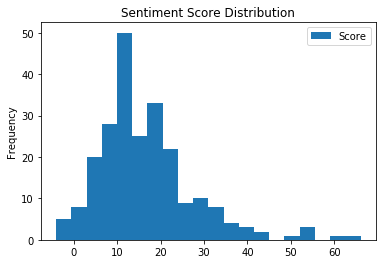

In [8]:
plt.figure()
df.plot.hist(bins=20)
plt.title('Sentiment Score Distribution')
plt.show()

What should your sentiment scores be compared to?
-------------------------------------------------
I think more data collection would be needed, ie. Competitor Research.
You need Reviewer comments from similar sized hotels that are in
the same region and have the same star-level, and are in the same price range.